# Statistical Learning
### 1. [Time Series](https://medium.com/tej-api-%E9%87%91%E8%9E%8D%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90/%E8%B3%87%E6%96%99%E7%A7%91%E5%AD%B8-%E5%8D%81-arima-garch%E6%A8%A1%E5%9E%8B-%E4%B8%8A-4cf07dac75fd)
### 2. Statistical Learning for Language Model

In [193]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import seaborn as sns
import pmdarima as pmd
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_squared_error


In [86]:
pd.Timestamp.now().date().strftime("%Y-%m-%d %H:%M:%S")
data = yf.download(symbol, start="2000-01-01", end=pd.Timestamp.now().strftime("%Y-%m-%d"))
pd.Timestamp.now().strftime("%Y-%m-%d")

[*********************100%%**********************]  1 of 1 completed


'2023-11-25'

In [174]:
# Replace "2409" with the actual stock symbol you are interested in
symbol = "2409.TW"

# Download historical data
data = yf.download(symbol, start="2000-01-01", end=pd.Timestamp.now().strftime("%Y-%m-%d")).reset_index()
data["Return"] = (data["Close"].shift(-1) - data["Close"])/data["Close"]
train_window = 20
split_time = pd.Timestamp(2020, 1, 1)
train = data[data["Date"] <= split_time]
test = data[data["Date"] >= split_time]

[*********************100%%**********************]  1 of 1 completed


In [100]:
def check_stationality(data):
    s, n, e = 0, 0, 0
    return_pvalue = adfuller(data["Return"])[1]
    # 設定判別式以及0.05的P-value標準
    if return_pvalue > 0.05:
        print('Nonstationary')
    else:
        print('Stationary')

    print("===========================================")

    price_pvalue = adfuller(data["Close"])[1]
    # 設定判別式以及0.05的P-value標準
    if price_pvalue > 0.05:
        print('Nonstationary')
    else:
        print('Stationary')

check_stationality(train)

param = pmd.auto_arima(train["Return"], stationary = True)
model = ARIMA(train["Return"], order = param.order)
print(param.order)
ts = model.fit()

ts.summary()
ts.plot_diagnostics(figsize = (15, 6))
plt.show()

Stationary
Nonstationary


In [186]:
data[(data["Date"] <= split_time + pd.Timedelta(days = 10))
                    & (data["Date"] >= split_time - pd.Timedelta(days = 10))]#["Return]

,Date,Open,High,Low,Close,Adj Close,Volume,Return
4828,2019-12-25,12.5625,12.8125,12.5625,12.6875,10.015631,49644857,-0.004926
4829,2019-12-26,12.7500,12.8125,12.5625,12.6250,9.966291,18907067,0.004950
4830,2019-12-27,12.6250,13.0625,12.6250,12.6875,10.015631,60419740,-0.004926
4831,2019-12-30,12.6875,12.8125,12.5625,12.6250,9.966291,28064710,-0.004950
4832,2019-12-31,12.6250,12.6875,12.5625,12.5625,9.916954,21239320,0.009950
4833,2020-01-02,12.6875,12.7500,12.6250,12.6875,10.015631,27294720,-0.009852
4834,2020-01-03,12.7500,12.8125,12.3625,12.5625,9.916954,51887718,-0.008955
4835,2020-01-06,12.6250,12.7500,12.3625,12.4500,9.828145,53631657,0.009036
4836,2020-01-07,12.5625,12.7500,12.4750,12.5625,9.916954,52841986,0.029851
4837,2020-01-08,12.4500,12.9375,12.3125,12.9375,10.212982,116149244,-0.019324


In [ ]:
# test: all test set
# test_: each sample
forecast_step = len(test)
prediction_test = []
real_test = []

for i in range(forecast_step):
    train = data[(data["Date"] >= split_time-pd.Timedelta(days = train_window))
                    & (data["Date"] < split_time)]["Return"]
    test_ = data[(data["Date"] <= split_time + pd.Timedelta(days = 1))
                    & (data["Date"] >= split_time)]["Return"]
    if len(test_) == 0:
        split_time += pd.Timedelta(days = 1)
        continue

    param = pmd.auto_arima(train, stationary = True)
    print(param.order)
    
    model = ARIMA(train, order = param.order)
    ts = model.fit()
    
    forecast = ts.get_forecast(steps=1)
    prediction = forecast.predicted_mean
    confidence = forecast.conf_int

    prediction_test.append(prediction.values[0])
    real_test.append(test_.values[0])
    print(prediction.values[0])
    print(test_.values[0])
    split_time += pd.Timedelta(days = 1)

plt.plot(prediction_test)

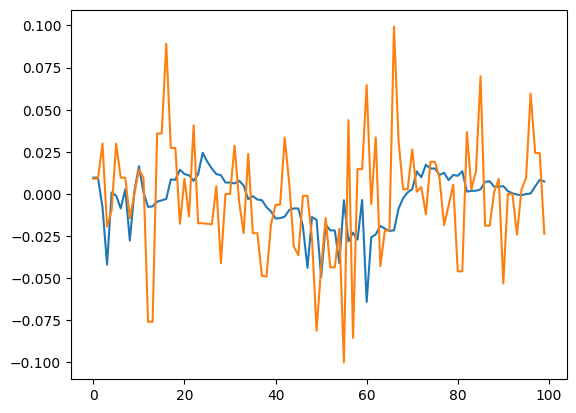

In [198]:
mean_squared_error(prediction_test, real_test)
plt.plot(prediction_test[:100])
plt.plot(real_test[:100])

In [64]:
for i in prediction_test:
    print(i.values[0])

-0.009733310222477734
0.015740675917185712
-0.0029214356641005914
-0.0033196491386555246
-0.004486962796118783
-0.00446920195995121
-0.005270595666133349
-0.0028896428688190085
-0.0043932442567805275
-0.0025765486749374754
-0.0052374935380177234
-0.00338505071541285
0.0004403558802899795
0.005059291786552395
0.0054859018703509385
0.005091584131265186
-0.004179023517956709
-0.006143257830762439
-0.0065581934725376925
-0.0057830017950535545
-0.004116365162021813
-0.002477047687002115
-0.0036362982420372154
-0.00788381631852578
-0.007949527220365817
-0.006730254905546435
0.0029146582678895323
0.005331512064581515
0.008108738403706605
0.009647248262128481
0.008359408788636011
0.005965152575486146
0.005942153281680039
0.007480271264719098
0.00828709226405651
0.007067751628751303
-0.0037095279326454667
-0.021284810147258117
-0.001491304467068236
-0.0014670300629106565
-0.0033842260437869985
-0.0026295234237760125
-0.0006666945790265884
-0.001421195090314212
-0.0021814167284380363
-0.00256428

In [28]:
resid = ts.resid
white_noise = acorr_ljungbox(resid.dropna(), lags = [1], return_df=True)
white_noise

,lb_stat,lb_pvalue
1,0.027352,0.86864
